# Лабораторная работа № 2. Логистическая регрессия

На основе набора данных об измерениях роста и веса решите следующую задачу.

Файл с данными - [Davis.csv](https://github.com/sdukshis/ml-intro/blob/master/datasets/Davis.csv)

Расширьте набор признаков добавив данные об измеренном и сообщенном весе, а также данные об поле человека.

Обратите внимание, что в некоторых строках встречаются пропуски. Это обычная ситуация при работе с реальными данными. Эти пропуски необходиму убрать из таблицы вместе со всей строкой. Это можно сделать с помощью метода [pandas.DataFrame.dropna](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.dropna.html)

In [1]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [6]:
ds = pd.read_csv('https://raw.githubusercontent.com/sdukshis/ml-intro/master/datasets/Davis.csv', index_col=0)
ds.head()

,sex,weight,height,repwt,repht
1,M,77,182,77.0,180.0
2,F,58,161,51.0,159.0
3,F,53,161,54.0,158.0
4,M,68,177,70.0,175.0
5,F,59,157,59.0,155.0


In [5]:
from sklearn.linear_model import LogisticRegression

## Задание

1. Обучите модель логистической регресси на данных, используя в качестве целевой переменной пол (sex), а в качестве признаков рост и вес (height, weight).
2. Нарисуйте точки выборки и разделяющую поверхость.
2. Оцените точность и полноту полученного решения и постройте график ROC кривой
3. Расширьте простарнство признаков квадратичными признаками.
2. Нарисуйте точки выборки и разделяющую поверхость.
2. Оцените точность и полноту полученного решения и постройте график ROC кривой

In [48]:
import pandas as pd
%pylab inline
ds = pd.read_csv('https://raw.githubusercontent.com/sdukshis/ml-intro/master/datasets/Davis.csv', index_col=0)
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


C:\Users\Dima\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['mod']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [49]:
ds['sex'] = ds['sex'].map(lambda s: {'M': 0, 'F': 1}[s])

In [50]:
U=ds.dropna()
U.describe()

,sex,weight,height,repwt,repht
count,181.000000,181.000000,181.000000,181.000000,181.000000
mean,0.546961,65.701657,170.756906,65.679558,168.657459
std,0.499171,13.425492,8.954609,13.834220,9.394668
min,0.000000,39.000000,148.000000,41.000000,148.000000
25%,0.000000,56.000000,164.000000,55.000000,161.000000
50%,1.000000,63.000000,169.000000,63.000000,168.000000
75%,1.000000,74.000000,178.000000,74.000000,175.000000
max,1.000000,119.000000,197.000000,124.000000,200.000000


In [92]:
# Выборка на обучение
x1=pd.DataFrame(U.height)
y=pd.DataFrame(U.sex)
x1=x1.dropna()
y=y.dropna()

In [93]:
from sklearn.model_selection import train_test_split
X1_tr,X1_test,Y_tr,Y_test=train_test_split(x1,y,test_size=0.6)

In [94]:
import math
import numpy as np
xh=np.array(X1_tr)
yh=np.array(Y_tr)
nx=len(xh)
ny=len(yh)
print("Leng(X)= ",nx, "Leng(Y)= ",ny)

Leng(X)=  72 Leng(Y)=  72


In [95]:
len(X1_test)

109

In [96]:
from sklearn.linear_model import LinearRegression

Text(0.5, 0, 'Height')

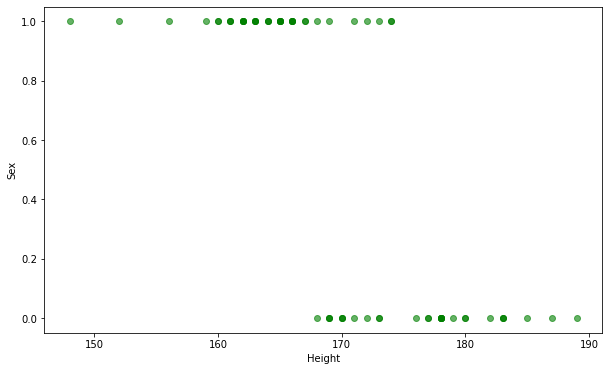

In [97]:
##Grafon
plt.figure(figsize=(10,6)) #размер
plt.scatter(X1_tr,Y_tr,alpha=0.60, color='green') #Oy = height рост(см) Ox = weight вес(кг)
#plt.scatter(f.weight,f.height,alpha=0.55, color='blue')
#plt.scatter(x1,y,alpha=0.54, color='k')
plt.ylabel('Sex')
plt.xlabel('Height')

In [98]:
## Im model
Model=LinearRegression()

In [99]:
x_rg=pd.DataFrame(X1_tr)
y_rg=pd.DataFrame(Y_tr)
Model.fit(x_rg,y_rg)

LinearRegression()

In [100]:
len(x_rg)

72

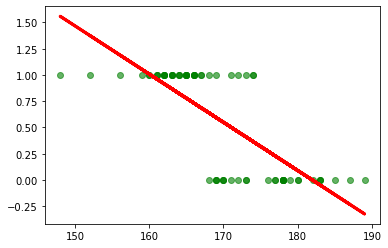

In [101]:
plt.plot(x_rg,Model.predict(x_rg), color='red',linewidth=3)
plt.scatter(X1_tr,Y_tr,alpha=0.60, color='green')

In [102]:
print(Model.coef_,Model.intercept_)

[[-0.04591258]] [8.35417707]


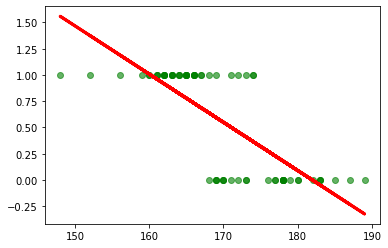

In [103]:
plt.plot(x_rg,Model.coef_*x_rg+Model.intercept_, color='red',linewidth=3)
plt.scatter(X1_tr,Y_tr,alpha=0.60, color='green')

In [104]:
t = np.linspace(-150, 160, 72)
t1 = np.linspace(-150, 160, 109)

In [105]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(C=1e+10)
model.fit(x_rg,y_rg)
S=model.coef_

C:\Users\Dima\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [106]:
print(S)

[[-0.47349843]]


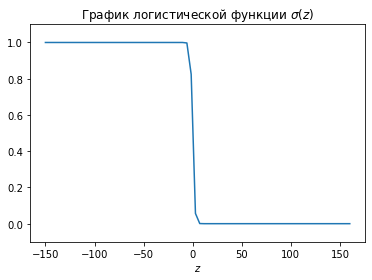

In [107]:
sigma = np.exp(-t)/(1+np.exp(-t))
plt.plot(t, sigma)
plt.ylim(-0.1, 1.1)
plt.xlabel('$z$')
plt.title('График логистической функции $\sigma(z)$');

In [108]:
y_pas=S*x_rg
m=(y_pas>0)
n=(y_pas<0)

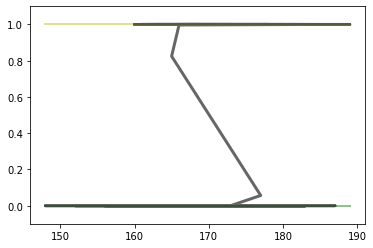

In [109]:
plt.plot(x_rg,m,color='green',linewidth=2,alpha=0.45)
plt.plot(x_rg,n,color='y',linewidth=2,alpha=0.45)
sigm= lambda t:np.exp(-t)/(1+np.exp(-t))
plt.ylim(-0.1, 1.1)
plt.plot(X1_tr,sigm(t),color='k',linewidth=3,alpha=0.6)

In [110]:
# Выборка на обучение
x2=pd.DataFrame(U.weight)
y1=pd.DataFrame(U.sex)
x2=x2.dropna()
y1=y1.dropna()

In [111]:
from sklearn.model_selection import train_test_split
X2_tr,X2_test,Y1_tr,Y1_test=train_test_split(x2,y1,test_size=0.6)

In [112]:
print(len(X2_tr),len(X2_test))

72 109


Text(0.5, 0, 'Weight')

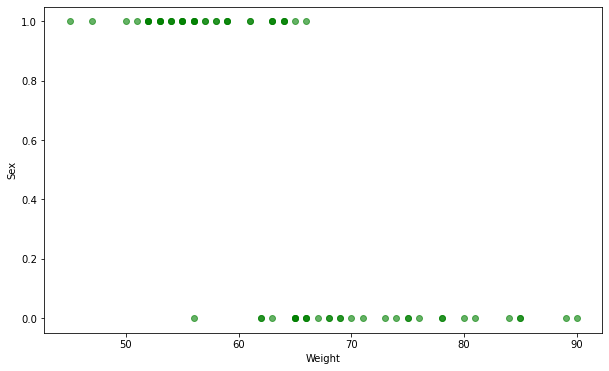

In [113]:
##Grafon
plt.figure(figsize=(10,6)) #размер
plt.scatter(X2_tr,Y1_tr,alpha=0.60, color='green')
plt.ylabel('Sex')
plt.xlabel('Weight')

In [114]:
ts = np.linspace(-150, 160, len(X2_tr))

In [115]:
from sklearn.linear_model import LinearRegression

In [116]:
## Im model
Model=LinearRegression()
x2_rg=pd.DataFrame(X2_tr)
y1_rg=pd.DataFrame(Y1_tr)
Model.fit(x2_rg,y1_rg)

LinearRegression()

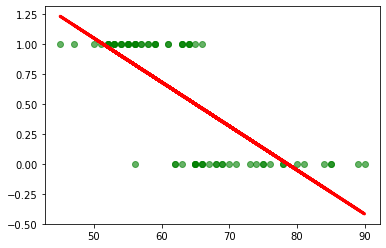

In [117]:
plt.plot(x2_rg,Model.predict(x2_rg), color='red',linewidth=3)
plt.scatter(X2_tr,Y1_tr,alpha=0.60, color='green')

In [118]:
mod=LogisticRegression(C=1e+10)
mod.fit(x2_rg,y1_rg)
S2=mod.coef_

C:\Users\Dima\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


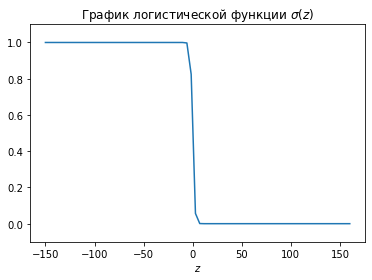

In [119]:
sigma = 1/(1+np.exp(ts))
plt.plot(ts, sigma)
plt.ylim(-0.1, 1.1)
plt.xlabel('$z$')
plt.title('График логистической функции $\sigma(z)$');

In [120]:
y1_pas=S*x2_rg
m1=(y1_pas>0)
n1=(y1_pas<0)

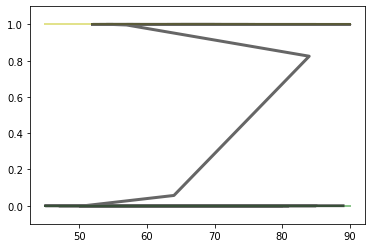

In [121]:
plt.plot(x2_rg,m1,color='green',linewidth=2,alpha=0.45)
plt.plot(x2_rg,n1,color='y',linewidth=2,alpha=0.45)
sigm= lambda t:1/(1+np.exp(t))
plt.ylim(-0.1, 1.1)
plt.plot(X2_tr,sigm(ts),color='k',linewidth=3,alpha=0.6)

## ROC кривая

In [122]:
xh=np.array(x_rg)
yh=np.array(y_rg)
nx=len(xh)
ny=len(yh)
nx=len(xh)
for i in range(0,nx):
    print(yh[i],"= ",sigm(yh[i]));

[1] =  [0.26894142]
[0] =  [0.5]
[1] =  [0.26894142]
[0] =  [0.5]
[0] =  [0.5]
[0] =  [0.5]
[0] =  [0.5]
[1] =  [0.26894142]
[0] =  [0.5]
[0] =  [0.5]
[0] =  [0.5]
[1] =  [0.26894142]
[1] =  [0.26894142]
[1] =  [0.26894142]
[1] =  [0.26894142]
[0] =  [0.5]
[1] =  [0.26894142]
[1] =  [0.26894142]
[0] =  [0.5]
[0] =  [0.5]
[1] =  [0.26894142]
[1] =  [0.26894142]
[0] =  [0.5]
[1] =  [0.26894142]
[1] =  [0.26894142]
[1] =  [0.26894142]
[0] =  [0.5]
[1] =  [0.26894142]
[0] =  [0.5]
[1] =  [0.26894142]
[0] =  [0.5]
[0] =  [0.5]
[0] =  [0.5]
[1] =  [0.26894142]
[1] =  [0.26894142]
[0] =  [0.5]
[1] =  [0.26894142]
[0] =  [0.5]
[0] =  [0.5]
[1] =  [0.26894142]
[1] =  [0.26894142]
[1] =  [0.26894142]
[1] =  [0.26894142]
[1] =  [0.26894142]
[0] =  [0.5]
[0] =  [0.5]
[1] =  [0.26894142]
[1] =  [0.26894142]
[1] =  [0.26894142]
[1] =  [0.26894142]
[1] =  [0.26894142]
[0] =  [0.5]
[1] =  [0.26894142]
[1] =  [0.26894142]
[0] =  [0.5]
[1] =  [0.26894142]
[0] =  [0.5]
[1] =  [0.26894142]
[1] =  [0.26894

In [123]:
Positives=0
Negatives=0
j=0
k=0
for i in range(0,nx):
    if (yh[i]==1):
        j=j+1
        Positives=np.sum(yh[i])
    else: k=k+1;  Negatives=np.sum(yh[i])
print('y=1:',j, 'y=0:',k)        

y=1: 41 y=0: 31


In [124]:
print(Positives,Negatives)

1 0


In [125]:
print(1/j,1/k)

0.024390243902439025 0.03225806451612903


In [126]:
A=[]
B=[]
a=0
b=0
A.append(a)
B.append(b)
for i in range(0,nx):
    if(yh[i]==1): 
        a=a+1/j
        A.append(a)
        print(i,' A= ',a)
    else:
        b=b+1/k
        B.append(b)
        print(i,' B= ',b)
print('\n TPR :',A)
print('\n FPR :',B)

0  A=  0.024390243902439025
1  B=  0.03225806451612903
2  A=  0.04878048780487805
3  B=  0.06451612903225806
4  B=  0.0967741935483871
5  B=  0.12903225806451613
6  B=  0.16129032258064516
7  A=  0.07317073170731708
8  B=  0.1935483870967742
9  B=  0.22580645161290322
10  B=  0.25806451612903225
11  A=  0.0975609756097561
12  A=  0.12195121951219512
13  A=  0.14634146341463414
14  A=  0.17073170731707316
15  B=  0.29032258064516125
16  A=  0.19512195121951217
17  A=  0.2195121951219512
18  B=  0.32258064516129026
19  B=  0.35483870967741926
20  A=  0.2439024390243902
21  A=  0.26829268292682923
22  B=  0.38709677419354827
23  A=  0.2926829268292683
24  A=  0.3170731707317073
25  A=  0.34146341463414637
26  B=  0.41935483870967727
27  A=  0.3658536585365854
28  B=  0.4516129032258063
29  A=  0.39024390243902446
30  B=  0.4838709677419353
31  B=  0.5161290322580643
32  B=  0.5483870967741933
33  A=  0.4146341463414635
34  A=  0.43902439024390255
35  B=  0.5806451612903223
36  A=  0.46341

In [127]:
len(A)

42

In [128]:
len(B)

32

In [129]:
B

[0,
 0.03225806451612903,
 0.06451612903225806,
 0.0967741935483871,
 0.12903225806451613,
 0.16129032258064516,
 0.1935483870967742,
 0.22580645161290322,
 0.25806451612903225,
 0.29032258064516125,
 0.32258064516129026,
 0.35483870967741926,
 0.38709677419354827,
 0.41935483870967727,
 0.4516129032258063,
 0.4838709677419353,
 0.5161290322580643,
 0.5483870967741933,
 0.5806451612903223,
 0.6129032258064513,
 0.6451612903225803,
 0.6774193548387093,
 0.7096774193548383,
 0.7419354838709673,
 0.7741935483870963,
 0.8064516129032253,
 0.8387096774193543,
 0.8709677419354833,
 0.9032258064516123,
 0.9354838709677413,
 0.9677419354838703,
 0.9999999999999993]

In [130]:
A

[0,
 0.024390243902439025,
 0.04878048780487805,
 0.07317073170731708,
 0.0975609756097561,
 0.12195121951219512,
 0.14634146341463414,
 0.17073170731707316,
 0.19512195121951217,
 0.2195121951219512,
 0.2439024390243902,
 0.26829268292682923,
 0.2926829268292683,
 0.3170731707317073,
 0.34146341463414637,
 0.3658536585365854,
 0.39024390243902446,
 0.4146341463414635,
 0.43902439024390255,
 0.4634146341463416,
 0.48780487804878064,
 0.5121951219512196,
 0.5365853658536587,
 0.5609756097560977,
 0.5853658536585368,
 0.6097560975609758,
 0.6341463414634149,
 0.6585365853658539,
 0.682926829268293,
 0.707317073170732,
 0.731707317073171,
 0.7560975609756101,
 0.7804878048780491,
 0.8048780487804882,
 0.8292682926829272,
 0.8536585365853663,
 0.8780487804878053,
 0.9024390243902444,
 0.9268292682926834,
 0.9512195121951225,
 0.9756097560975615,
 1.0000000000000004]

In [131]:
y=[A[0],A[0],A[0],A[1],A[1],A[2],A[2],A[2],A[2],A[3],A[4],A[4],A[4],A[4],A[4],A[5],
  A[6],A[7],A[7],A[7],A[7],A[8],A[9],A[9],A[9],A[9],A[10],A[11],
  A[11],A[11],A[12],A[13],A[13],A[14],A[15],A[15],A[15],A[16],A[17],A[18],
  A[18],A[18],A[19],A[20],A[21],A[21],A[22],A[23],A[24],A[25],
  A[25],A[26],A[26],A[27],A[28],A[29],A[30],A[30],A[30],
  A[31],A[32],A[33],A[34],A[34],
  A[35],A[36],A[37],A[38],A[39],A[39],A[39],A[40],A[41]]
x=[B[0],B[1],B[2],B[2],B[3],B[3],B[4],B[5],B[6],B[6],B[6],B[7],B[8],B[9],B[10],B[10],
  B[10],B[10],B[11],B[12],B[13],B[13],B[13],B[14],B[15],B[16],B[16],B[16],
  B[17],B[18],B[18],B[18],B[19],B[19],B[19],B[20],B[21],B[21],B[21],B[21],
  B[22],B[23],B[23],B[23],B[23],B[24],B[24],B[24],B[24],B[24],
  B[25],B[25],B[26],B[26],B[26],B[26],B[26],B[27],B[28],
  B[28],B[28],B[28],B[28],B[29],
  B[29],B[29],B[29],B[29],B[29],B[30],B[31],B[31],B[31]]
xh=array(x); f=array(y)

0  ( 0.0  ;  0.0 )
1  ( 0.03225806451612903  ;  0.0 )
2  ( 0.06451612903225806  ;  0.0 )
3  ( 0.06451612903225806  ;  0.024390243902439025 )
4  ( 0.0967741935483871  ;  0.024390243902439025 )
5  ( 0.0967741935483871  ;  0.04878048780487805 )
6  ( 0.12903225806451613  ;  0.04878048780487805 )
7  ( 0.16129032258064516  ;  0.04878048780487805 )
8  ( 0.1935483870967742  ;  0.04878048780487805 )
9  ( 0.1935483870967742  ;  0.07317073170731708 )
10  ( 0.1935483870967742  ;  0.0975609756097561 )
11  ( 0.22580645161290322  ;  0.0975609756097561 )
12  ( 0.25806451612903225  ;  0.0975609756097561 )
13  ( 0.29032258064516125  ;  0.0975609756097561 )
14  ( 0.32258064516129026  ;  0.0975609756097561 )
15  ( 0.32258064516129026  ;  0.12195121951219512 )
16  ( 0.32258064516129026  ;  0.14634146341463414 )
17  ( 0.32258064516129026  ;  0.17073170731707316 )
18  ( 0.35483870967741926  ;  0.17073170731707316 )
19  ( 0.38709677419354827  ;  0.17073170731707316 )
20  ( 0.41935483870967727  ;  0.1707317073

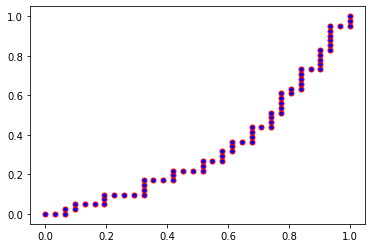

In [132]:
nx=len(xh)
for i in range(0,nx):
    print(i,' (',xh[i]," ; ",f[i],')');
    plt.plot(xh[i],f[i],color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=5)

## Roc кривая для Weight

In [133]:
xh=np.array(x2_rg)
yh=np.array(y1_rg)
nx=len(xh)
ny=len(yh)
nx=len(xh)
for i in range(0,nx):
    print(yh[i],"= ",sigm(yh[i]))

[1] =  [0.26894142]
[0] =  [0.5]
[1] =  [0.26894142]
[0] =  [0.5]
[0] =  [0.5]
[0] =  [0.5]
[1] =  [0.26894142]
[1] =  [0.26894142]
[1] =  [0.26894142]
[1] =  [0.26894142]
[1] =  [0.26894142]
[1] =  [0.26894142]
[1] =  [0.26894142]
[1] =  [0.26894142]
[1] =  [0.26894142]
[1] =  [0.26894142]
[0] =  [0.5]
[0] =  [0.5]
[0] =  [0.5]
[1] =  [0.26894142]
[0] =  [0.5]
[1] =  [0.26894142]
[1] =  [0.26894142]
[1] =  [0.26894142]
[1] =  [0.26894142]
[0] =  [0.5]
[0] =  [0.5]
[0] =  [0.5]
[0] =  [0.5]
[0] =  [0.5]
[1] =  [0.26894142]
[1] =  [0.26894142]
[1] =  [0.26894142]
[1] =  [0.26894142]
[0] =  [0.5]
[1] =  [0.26894142]
[1] =  [0.26894142]
[0] =  [0.5]
[0] =  [0.5]
[0] =  [0.5]
[1] =  [0.26894142]
[0] =  [0.5]
[0] =  [0.5]
[1] =  [0.26894142]
[0] =  [0.5]
[0] =  [0.5]
[1] =  [0.26894142]
[0] =  [0.5]
[1] =  [0.26894142]
[1] =  [0.26894142]
[1] =  [0.26894142]
[1] =  [0.26894142]
[0] =  [0.5]
[0] =  [0.5]
[0] =  [0.5]
[1] =  [0.26894142]
[0] =  [0.5]
[0] =  [0.5]
[1] =  [0.26894142]
[1] =  [0

In [134]:
A=[]
B=[]
a=0
b=0
A.append(a)
B.append(b)
for i in range(0,nx):
    if(yh[i]==1): 
        a=a+1/j
        A.append(a)
        print(i,' A= ',a)
    else:
        b=b+1/k
        B.append(b)
        print(i,' B= ',b)
print('\n TPR :',A)
print('\n FPR :',B)

0  A=  0.024390243902439025
1  B=  0.03225806451612903
2  A=  0.04878048780487805
3  B=  0.06451612903225806
4  B=  0.0967741935483871
5  B=  0.12903225806451613
6  A=  0.07317073170731708
7  A=  0.0975609756097561
8  A=  0.12195121951219512
9  A=  0.14634146341463414
10  A=  0.17073170731707316
11  A=  0.19512195121951217
12  A=  0.2195121951219512
13  A=  0.2439024390243902
14  A=  0.26829268292682923
15  A=  0.2926829268292683
16  B=  0.16129032258064516
17  B=  0.1935483870967742
18  B=  0.22580645161290322
19  A=  0.3170731707317073
20  B=  0.25806451612903225
21  A=  0.34146341463414637
22  A=  0.3658536585365854
23  A=  0.39024390243902446
24  A=  0.4146341463414635
25  B=  0.29032258064516125
26  B=  0.32258064516129026
27  B=  0.35483870967741926
28  B=  0.38709677419354827
29  B=  0.41935483870967727
30  A=  0.43902439024390255
31  A=  0.4634146341463416
32  A=  0.48780487804878064
33  A=  0.5121951219512196
34  B=  0.4516129032258063
35  A=  0.5365853658536587
36  A=  0.5609

In [135]:
print(len(A),len(B))

41 33


In [136]:
y=[A[1],A[1],A[2],A[2],A[2],A[2],A[3],A[4],A[5],A[6],A[7],A[8],A[9],A[10],A[11],A[12],
  A[12],A[12],A[12],A[13],A[13],A[14],A[15],A[16],A[17],A[17],A[17],A[17],
  A[17],A[17],A[18],A[19],A[20],A[21],A[21],A[22],A[23],A[23],A[23],A[23],
  A[24],A[24],A[24],A[25],A[25],A[25],A[26],A[26],A[27],A[28],
  A[29],A[30],A[30],A[30],A[30],A[31],A[31],A[31],A[32],
  A[33],A[33],A[34],A[35],A[36],
  A[37],A[38],A[38],A[39],A[39],A[40],A[40],A[40]]
x=[B[0],B[1],B[1],B[2],B[3],B[4],B[4],B[4],B[4],B[4],B[4],B[4],B[4],B[4],B[4],B[4],
  B[5],B[6],B[7],B[7],B[8],B[8],B[8],B[8],B[8],B[9],B[10],B[11],
  B[12],B[13],B[13],B[13],B[13],B[13],B[14],B[14],B[14],B[15],B[16],B[17],
  B[17],B[18],B[19],B[19],B[20],B[21],B[21],B[22],B[22],B[22],
  B[22],B[22],B[23],B[24],B[25],B[25],B[26],B[27],B[27],
  B[27],B[28],B[28],B[28],B[28],
  B[28],B[28],B[29],B[29],B[30],B[30],B[31],B[32]]
xh=array(x); f=array(y)

0  ( 0.0  ;  0.024390243902439025 )
1  ( 0.03225806451612903  ;  0.024390243902439025 )
2  ( 0.03225806451612903  ;  0.04878048780487805 )
3  ( 0.06451612903225806  ;  0.04878048780487805 )
4  ( 0.0967741935483871  ;  0.04878048780487805 )
5  ( 0.12903225806451613  ;  0.04878048780487805 )
6  ( 0.12903225806451613  ;  0.07317073170731708 )
7  ( 0.12903225806451613  ;  0.0975609756097561 )
8  ( 0.12903225806451613  ;  0.12195121951219512 )
9  ( 0.12903225806451613  ;  0.14634146341463414 )
10  ( 0.12903225806451613  ;  0.17073170731707316 )
11  ( 0.12903225806451613  ;  0.19512195121951217 )
12  ( 0.12903225806451613  ;  0.2195121951219512 )
13  ( 0.12903225806451613  ;  0.2439024390243902 )
14  ( 0.12903225806451613  ;  0.26829268292682923 )
15  ( 0.12903225806451613  ;  0.2926829268292683 )
16  ( 0.16129032258064516  ;  0.2926829268292683 )
17  ( 0.1935483870967742  ;  0.2926829268292683 )
18  ( 0.22580645161290322  ;  0.2926829268292683 )
19  ( 0.22580645161290322  ;  0.3170731707317

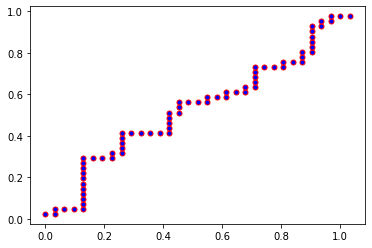

In [137]:
nx=len(xh)
for i in range(0,nx):
    print(i,' (',xh[i]," ; ",f[i],')');
    plt.plot(xh[i],f[i],color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=5)